In [1]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma

In [2]:
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv") # first 19 documents with their ground truth

In [3]:
data

Documents                      file_name  \
0    document1        Nacaps-W1_questionnaire   
1    document2                        WeGe_W2   
2    document3                      StuMa2020   
3    document4         Studierdenensurvey2016   
4    document5       Absolventen_2009.2_Haupt   
5    document6                  Promopanel_W4   
6    document7      Studienberechtigte_2008.3   
7    document8   Wissenschaftlerbefragung2016   
8    document9                  Promopanel_W3   
9   document10               Sozialerhebung20   
10  document11                        WeGe_W3   
11  document12                  Promopanel_W5   
12  document13                     sid_corona   
13  document14                  Promopanel_W2   
14  document15             Absolventen_2013-2   
15  document16   Absolventen_2009.2_Promotion   
16  document17               Sozialerhebung21   
17  document18  Absolventen_2009.2_Mobilität   
18  document19               Sozialerhebung19   

                                                 Text  \
0   "Die Hochschule, an der Sie im Dezember 2018 z...   
1   "Wie ist dieser studienvorbereitende Kurs verl...   
2   "Welchen Studienabschluss haben Sie in Ihrem l...   
3   "An welcher Art Hochschule studieren Sie. Univ...   
4   "Wie würden Sie Ihre derzeitige Tätigkeit bzw....   
5   "Waren oder sind Sie seit der letzten Befragun...   
6   "Wie zufrieden sind Sie mit Ihrem bisherigen B...   
7   "In welcher Sprache möchten Sie die Befragung ...   
8   "Waren oder sind Sie seit der letzten Befragun...   
9   "Welchen Abschluss streben Sie in Ihrem derzei...   
10  "Welches Ergebnis haben Sie bei der Sprachprüf...   
11  "Waren oder sind Sie seit der letzten Befragun...   
12  "Befinden Sie sich aktuell in einem Urlaubssem...   
13  "Haben Sie einen Ausbildungsberuf erlernt (z.B...   
14  "Waren Sie seit Ihrem Studienabschluss, den Si...   
15  "Haben Sie eine Promotion begonnen oder abgesc...   
16  "Werden Sie im Sommersemester 2016 nach dem BA...   
17  "Haben Sie noch in einer weiteren Wohnung gele...   
18  "angestrebter Abschluss.  erworbener Abschluss...   

                                         Ground_Truth  
0   'wissenschaftssystem', 'betreuung', 'wissensch...  
1   'integration', 'geflüchtete', 'studienkolleg',...  
2   'beruflicher verbleib von exmatrikulierten', '...  
3   'evaluation', 'qualifikation', 'effizienz', 's...  
4                                'hochschulforschung'  
5   'promotion', 'hochschulforschung', 'promotion'...  
6          'studienberechtigte', 'hochschulforschung'  
7                                'hochschulforschung'  
8   'promotion', 'hochschulforschung', 'promotion'...  
9                                'hochschulforschung'  
10  'integration', 'geflüchtete', 'studienkolleg',...  
11  'promotion', 'hochschulforschung', 'promotion'...  
12  'internationale studierende', 'digitale lehre'...  
13  'promotion', 'hochschulforschung', 'promotions...  
14                'absolventen', 'hochschulforschung'  
15                               'hochschulforschung'  
16                               'hochschulforschung'  
17                               'hochschulforschung'  
18                               'hochschulforschung'

In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion',
  'arbeitsbedingungen',
  'weiterbildung',
  'wissenschaftliche aktivitäten',
  'auslandsaufenthalt',
  'gesundheit'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [6]:
only_keywords = []
for i in range(len(GT_within_text)):
    only_keywords.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            only_keywords[i].append(GT_within_text[i][j])

In [7]:
data['Valid_Ground_Truth'] = GT_within_text

In [8]:
only_keyphrases = []
for i in range(len(GT_within_text)):
    only_keyphrases.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) != 1:
            only_keyphrases[i].append(GT_within_text[i][j])

In [9]:
only_keyphrases

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [10]:
ground_truth_not_in_text = [['promotionsformen', 'promotionsmotive',  'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs','promotionsabbruch', 'strukturierte promotion', 'persönlichkeit', 'erwerbsverläufe', 'promovierte'],
                            ['integration', 'migration'], 
                            ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'abbruchursachen'],
                            ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['studienberechtigte', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['hochschulforschung'],
                            ['integration', 'migration'], 
                            ['hochschulforschung'], 
                            ['internationale studierende', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'persönlichkeit', 'beeinträchtigt studierende', 'studierende', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
                            ['hochschulforschung'],
                            ['absolventen', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung']]

In [11]:
data['Ground_Truth_Not_In_Text'] = ground_truth_not_in_text

In [12]:
data

Documents                      file_name  \
0    document1        Nacaps-W1_questionnaire   
1    document2                        WeGe_W2   
2    document3                      StuMa2020   
3    document4         Studierdenensurvey2016   
4    document5       Absolventen_2009.2_Haupt   
5    document6                  Promopanel_W4   
6    document7      Studienberechtigte_2008.3   
7    document8   Wissenschaftlerbefragung2016   
8    document9                  Promopanel_W3   
9   document10               Sozialerhebung20   
10  document11                        WeGe_W3   
11  document12                  Promopanel_W5   
12  document13                     sid_corona   
13  document14                  Promopanel_W2   
14  document15             Absolventen_2013-2   
15  document16   Absolventen_2009.2_Promotion   
16  document17               Sozialerhebung21   
17  document18  Absolventen_2009.2_Mobilität   
18  document19               Sozialerhebung19   

                                                 Text  \
0   "Die Hochschule, an der Sie im Dezember 2018 z...   
1   "Wie ist dieser studienvorbereitende Kurs verl...   
2   "Welchen Studienabschluss haben Sie in Ihrem l...   
3   "An welcher Art Hochschule studieren Sie. Univ...   
4   "Wie würden Sie Ihre derzeitige Tätigkeit bzw....   
5   "Waren oder sind Sie seit der letzten Befragun...   
6   "Wie zufrieden sind Sie mit Ihrem bisherigen B...   
7   "In welcher Sprache möchten Sie die Befragung ...   
8   "Waren oder sind Sie seit der letzten Befragun...   
9   "Welchen Abschluss streben Sie in Ihrem derzei...   
10  "Welches Ergebnis haben Sie bei der Sprachprüf...   
11  "Waren oder sind Sie seit der letzten Befragun...   
12  "Befinden Sie sich aktuell in einem Urlaubssem...   
13  "Haben Sie einen Ausbildungsberuf erlernt (z.B...   
14  "Waren Sie seit Ihrem Studienabschluss, den Si...   
15  "Haben Sie eine Promotion begonnen oder abgesc...   
16  "Werden Sie im Sommersemester 2016 nach dem BA...   
17  "Haben Sie noch in einer weiteren Wohnung gele...   
18  "angestrebter Abschluss.  erworbener Abschluss...   

                                         Ground_Truth  \
0   'wissenschaftssystem', 'betreuung', 'wissensch...   
1   'integration', 'geflüchtete', 'studienkolleg',...   
2   'beruflicher verbleib von exmatrikulierten', '...   
3   'evaluation', 'qualifikation', 'effizienz', 's...   
4                                'hochschulforschung'   
5   'promotion', 'hochschulforschung', 'promotion'...   
6          'studienberechtigte', 'hochschulforschung'   
7                                'hochschulforschung'   
8   'promotion', 'hochschulforschung', 'promotion'...   
9                                'hochschulforschung'   
10  'integration', 'geflüchtete', 'studienkolleg',...   
11  'promotion', 'hochschulforschung', 'promotion'...   
12  'internationale studierende', 'digitale lehre'...   
13  'promotion', 'hochschulforschung', 'promotions...   
14                'absolventen', 'hochschulforschung'   
15                               'hochschulforschung'   
16                               'hochschulforschung'   
17                               'hochschulforschung'   
18                               'hochschulforschung'   

                                   Valid_Ground_Truth  \
0   [wissenschaftssystem, betreuung, wissenschaftl...   
1   [geflüchtete, studienkolleg, studienvorbereitung]   
2                                     [masterstudium]   
3       [evaluation, qualifikation, studiensituation]   
4                                                  []   
5   [promotion, arbeitsbedingungen, wissenschaftli...   
6                                                  []   
7                                                  []   
8   [promotion, arbeitsbedingungen, wissenschaftli...   
9                                                  []   
10  [geflüchtete, studienkolleg, studienvorbereitung]   
11  [promotion, arbeitsbedingungen, weiterbildung,...   
1

In [13]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

# stemmer = SnowballStemmer("german")

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
877


In [15]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [16]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [17]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren . Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben . Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden . Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden . Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit kann sich daran etwas geändert haben . Bitte geben Sie an was aktuell auf Sie zutrifft . Ich promoviere . Ich habe das Promotionsverfahren abgeschlossen . Ich habe mein Promotionsvorhaben unterbrochen . Ich habe mein Promotionsvorhaben abgebrochen . Handelt es sich um eine offiziell der Hoch

In [18]:
Preprocesed_text = []
for i in range(len(data["clean_text"])):
    Preprocesed_text.append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["clean_text"][i]))  

In [19]:
Preprocesed_text[2]

'Welchen Studienabschluss haben Sie in Ihrem letzten Studium aus dem Sie sich im Sommersemester bzw. im Wintersemester exmatrikulierten angestrebt. Master. Bachelor. Staatsexamen. einen anderen Studienabschluss und zwar. Wann haben Sie die Entscheidung getroffen überhaupt ein Masterstudium aufzunehmen. vor Beginn des Studiums das zur Aufnahme des Masterstudiums berechtigte. während des Studiums das zur Aufnahme des Masterstudiums berechtigte. nach dem Studium das zur Aufnahme des Masterstudiums berechtigte. Inwiefern können Sie folgender Aussage zustimmen Bei Aufnahme meines letzten Masterstudiums war ich fest entschlossen dieses Studium auch zu beenden. stimme voll zu. stimme überhaupt nicht zu. Bitte geben Sie an ob Ihr letztes Masterstudium direkt auf Ihr zum Masterstudium berechtigendes Studium folgte. Der Beginn meines letzten Masterstudiums folgte unmittelbar auf mein zum Masterstudium berechtigendes Studium. Zwischen meinem zum Masterstudium berechtigenden Studium und der Aufnah

In [20]:
import re
test_text = []
for i in range(len(Preprocesed_text)):
    test_text.append(re.sub(r'\.+ ', ".",  Preprocesed_text[i]))

In [21]:
test_text[0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren.Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben.Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden.Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden.Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert.In der Zwischenzeit kann sich daran etwas geändert haben.Bitte geben Sie an was aktuell auf Sie zutrifft.Ich promoviere.Ich habe das Promotionsverfahren abgeschlossen.Ich habe mein Promotionsvorhaben unterbrochen.Ich habe mein Promotionsvorhaben abgebrochen.Handelt es sich um eine offiziell der Hochschule gemeldete Unter

In [22]:
cleaned_text = []
for i in range(len(test_text)):
    for line in test_text[i].split('\n'):
        # Replace multiple dots with space
        line = re.sub('\.\.+', '.', line) 
        # Remove single dots
        cleaned_text.append(re.sub('\.', '.', line))

In [23]:
cleaned_text[0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren.Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben.Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden.Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden.Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert.In der Zwischenzeit kann sich daran etwas geändert haben.Bitte geben Sie an was aktuell auf Sie zutrifft.Ich promoviere.Ich habe das Promotionsverfahren abgeschlossen.Ich habe mein Promotionsvorhaben unterbrochen.Ich habe mein Promotionsvorhaben abgebrochen.Handelt es sich um eine offiziell der Hochschule gemeldete Unter

In [24]:
final_cleaned_text = []
for i in range(len(cleaned_text)):
    final_cleaned_text.append(re.sub(r"\.(?=\S)", ". ", cleaned_text[i]))

In [25]:
final_cleaned_text[0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule geme

In [26]:
data['final_cleaned_text'] = final_cleaned_text

In [27]:
data["clean_text_wo_sw"] = data['final_cleaned_text'].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [28]:
data["clean_text_wo_sw"][0]

'hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren doppelbefragungen vermeiden innerhalb fragebogens angegebenen antworten hochschule zweck qualitätssicherung evaluation bereich doktorandenausbildung einverständnis vorausgesetzt weitergabe angaben hochschule einverstanden weitergabe angaben hochschule einverstanden anfang dezember hochschule offiziell doktorand registriert zwischenzeit geändert aktuell zutrifft promoviere promotionsverfahren abgeschlossen promotionsvorhaben unterbrochen promotionsvorhaben abgebrochen handelt offiziell hochschule gemeldete unterbrechung erinnern quartal arbeiten begonnen erinnern quartal zugelassen quartal quartal quartal quartal hochschule informiert promotion abgebrochen erinnern quartal promotion abgebrochen quartal quartal quartal quartal promotionsverfahren hochschule ausland beteiligt handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse promotionsverfahren fachhochschule hoc

In [29]:
nlp = spacy.load('de_core_news_lg')
nlp.max_length = 2011640 #1561466 #or any large value, as long as you don't run out of RAM

In [30]:
nlp.analyze_pipes(pretty=True) # this is de_core_news_lg's pipeline


============================= Pipeline Overview =============================

#   Component         Assigns               Requires   Scores             Retokenizes
-   ---------------   -------------------   --------   ----------------   -----------
0   tok2vec           doc.tensor                                          False      
                                                                                     
1   tagger            token.tag                        tag_acc            False      
                                                                                     
2   morphologizer     token.morph                      pos_acc            False      
                      token.pos                        morph_acc                     
                                                       morph_per_feat                
                                                                                     
3   parser            token.dep                        dep_u

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'morphologizer': {'assigns': ['token.morph', 'token.pos'],
   'requires': [],
   'scores': ['pos_acc', 'morph_acc', 'morph_per_feat'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_p

In [31]:
#using spacy model for POS tagging
Extracted_POS_tag_stopwords=[]
for i in range(len(stop_words)):
    sw = nlp(stop_words[i])
    for t in sw:
        tag=t.pos
        if t.text not in Extracted_POS_tag_stopwords:
            Extracted_POS_tag_stopwords.append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple

In [32]:
Extracted_POS_tag_stopwords

[('aber', 'CCONJ'),
 ('alle', 'PRON'),
 ('allem', 'PRON'),
 ('allen', 'PRON'),
 ('aller', 'DET'),
 ('alles', 'PRON'),
 ('als', 'ADP'),
 ('also', 'ADV'),
 ('am', 'ADP'),
 ('an', 'ADP'),
 ('ander', 'ADV'),
 ('andere', 'PRON'),
 ('anderem', 'PRON'),
 ('anderen', 'PRON'),
 ('anderer', 'PRON'),
 ('anderes', 'PRON'),
 ('anderm', 'ADV'),
 ('andern', 'PRON'),
 ('anderr', 'PROPN'),
 ('anders', 'ADV'),
 ('auch', 'ADV'),
 ('auf', 'ADP'),
 ('aus', 'ADP'),
 ('bei', 'ADP'),
 ('bin', 'AUX'),
 ('bis', 'ADP'),
 ('bist', 'AUX'),
 ('da', 'ADV'),
 ('damit', 'ADV'),
 ('dann', 'ADV'),
 ('der', 'DET'),
 ('den', 'DET'),
 ('des', 'DET'),
 ('dem', 'DET'),
 ('die', 'DET'),
 ('das', 'PRON'),
 ('dass', 'SCONJ'),
 ('daß', 'SCONJ'),
 ('derselbe', 'DET'),
 ('derselben', 'PRON'),
 ('denselben', 'PRON'),
 ('desselben', 'PRON'),
 ('demselben', 'PRON'),
 ('dieselbe', 'PRON'),
 ('dieselben', 'PRON'),
 ('dasselbe', 'PRON'),
 ('dazu', 'ADV'),
 ('dein', 'PRON'),
 ('deine', 'DET'),
 ('deinem', 'DET'),
 ('deinen', 'DET'),
 ('d

In [33]:
#construction a format to be passed to text rank pipeline
sw_keys = [elem[0] for elem in Extracted_POS_tag_stopwords ]
sw_value = [elem[1] for elem in Extracted_POS_tag_stopwords]
sw_value = [[elem] for elem in sw_value ]

In [34]:
dicts = {}
keys = sw_keys
values = sw_value
for i in range(len(keys)):
        dicts[keys[i]] = values[i]

In [35]:
dicts

{'aber': ['CCONJ'],
 'alle': ['PRON'],
 'allem': ['PRON'],
 'allen': ['PRON'],
 'aller': ['DET'],
 'alles': ['PRON'],
 'als': ['ADP'],
 'also': ['ADV'],
 'am': ['ADP'],
 'an': ['ADP'],
 'ander': ['ADV'],
 'andere': ['PRON'],
 'anderem': ['PRON'],
 'anderen': ['PRON'],
 'anderer': ['PRON'],
 'anderes': ['PRON'],
 'anderm': ['ADV'],
 'andern': ['PRON'],
 'anderr': ['PROPN'],
 'anders': ['ADV'],
 'auch': ['ADV'],
 'auf': ['ADP'],
 'aus': ['ADP'],
 'bei': ['ADP'],
 'bin': ['AUX'],
 'bis': ['ADP'],
 'bist': ['AUX'],
 'da': ['ADV'],
 'damit': ['ADV'],
 'dann': ['ADV'],
 'der': ['DET'],
 'den': ['DET'],
 'des': ['DET'],
 'dem': ['DET'],
 'die': ['DET'],
 'das': ['PRON'],
 'dass': ['SCONJ'],
 'daß': ['SCONJ'],
 'derselbe': ['DET'],
 'derselben': ['PRON'],
 'denselben': ['PRON'],
 'desselben': ['PRON'],
 'demselben': ['PRON'],
 'dieselbe': ['PRON'],
 'dieselben': ['PRON'],
 'dasselbe': ['PRON'],
 'dazu': ['ADV'],
 'dein': ['PRON'],
 'deine': ['DET'],
 'deinem': ['DET'],
 'deinen': ['DET'],
 'de

In [36]:
#using spacy model for POS tagging

Extracted_Pos_tags=[]  # can change it to Extracted_Noun
for i in range(len(final_cleaned_text)):
    Extracted_Pos_tags.append([])
    doc = nlp(data['final_cleaned_text'][i])
    for t in doc:
        tag=t.pos_
        if t.text not in Extracted_Pos_tags:
            Extracted_Pos_tags[i].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [37]:
Extracted_Pos_tags[3]

[('An', 'ADP'),
 ('welcher', 'DET'),
 ('Art', 'NOUN'),
 ('Hochschule', 'NOUN'),
 ('studieren', 'VERB'),
 ('Sie', 'PRON'),
 ('.', 'PUNCT'),
 ('Universität', 'NOUN'),
 ('Technische', 'ADJ'),
 ('Universität', 'NOUN'),
 ('.', 'PUNCT'),
 ('Fachhochschule', 'NOUN'),
 ('Hochschule', 'NOUN'),
 ('für', 'ADP'),
 ('angewandte', 'ADJ'),
 ('Wissenschaften', 'NOUN'),
 ('.', 'PUNCT'),
 ('Welchen', 'DET'),
 ('Abschluss', 'NOUN'),
 ('streben', 'VERB'),
 ('Sie', 'PRON'),
 ('an', 'ADP'),
 ('.', 'PUNCT'),
 ('Bachelor', 'NOUN'),
 ('.', 'PUNCT'),
 ('Master', 'NOUN'),
 ('.', 'PUNCT'),
 ('Diplom', 'NOUN'),
 ('.', 'PUNCT'),
 ('Magister', 'NOUN'),
 ('.', 'PUNCT'),
 ('Staatsexamen', 'NOUN'),
 ('.', 'PUNCT'),
 ('Promotion', 'NOUN'),
 ('.', 'PUNCT'),
 ('sonstiger', 'ADJ'),
 ('Abschluss', 'NOUN'),
 ('.', 'PUNCT'),
 ('kirchliche', 'ADJ'),
 ('Abschlussprüfung', 'NOUN'),
 ('.', 'PUNCT'),
 ('Streben', 'VERB'),
 ('Sie', 'PRON'),
 ('das', 'DET'),
 ('Lehramt', 'NOUN'),
 ('an', 'ADP'),
 ('.', 'PUNCT'),
 ('nein', 'PART'),
 

In [38]:
lemmatizer = GermaLemma()
lemmatized_words = []
nlp = spacy.load('de_core_news_lg')

for i in range(len(Extracted_Pos_tags)):
    lemmatized_words.append([])
    lemma_spacy = nlp(data['final_cleaned_text'][i])
    for j in range(len(lemma_spacy)):
        token = lemma_spacy[j]
        if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
            lemmatized_words[i].append(token.lemma_)
        else:
            temp = Extracted_Pos_tags[i][j][1]
            lemmatized_words[i].append(lemmatizer.find_lemma(Extracted_Pos_tags[i][j][0], Extracted_Pos_tags[i][j][1]))


In [39]:
lemmatized_words[0]

['der',
 'Hochschule',
 'an',
 'der',
 'ich',
 'im',
 'Dezember',
 'zur',
 'Promotion',
 'registrieren',
 'sein',
 'haben',
 'ebenfalls',
 'Interesse',
 'daran',
 'mehr',
 'über',
 'der',
 'Promotionsbedingung',
 'sich',
 'Promovierenden',
 'zu',
 'erfahren',
 '.',
 'um',
 'Doppelbefragung',
 'zu',
 'vermeiden',
 'mögen',
 'ich',
 'der',
 'von',
 'ich',
 'innerhalb',
 'dies',
 'Fragebogen',
 'angegeben',
 'Antwort',
 'an',
 'mein',
 'Hochschule',
 'zum',
 'Zweck',
 'der',
 'Qualitätssicherung',
 'und',
 'Evaluation',
 'im',
 'Bereich',
 'der',
 'Doktorandenausbildung',
 'mein',
 'Einverständnis',
 'voraussetzen',
 'weiter',
 'geben',
 '.',
 'Ja',
 'ich',
 'sein',
 'mit',
 'der',
 'Weitergabe',
 'sich',
 'Angabe',
 'an',
 'der',
 'Hochschule',
 'einverstand',
 '.',
 'Nein',
 'ich',
 'sein',
 'mit',
 'der',
 'Weitergabe',
 'sich',
 'Angabe',
 'an',
 'der',
 'Hochschule',
 'nicht',
 'einverstand',
 '.',
 'Anfang',
 'Dezember',
 'sein',
 'ich',
 'an',
 'sich',
 'Hochschule',
 'offiziell',


In [40]:
lemma_document = []
for i in range(len(lemmatized_words)):
    lemma_document.append(' '.join(lemmatized_words[i]))

In [41]:
lemma_document[0]  #len(lemma_document[0].split()) it will same as above , so not a problem

'der Hochschule an der ich im Dezember zur Promotion registrieren sein haben ebenfalls Interesse daran mehr über der Promotionsbedingung sich Promovierenden zu erfahren . um Doppelbefragung zu vermeiden mögen ich der von ich innerhalb dies Fragebogen angegeben Antwort an mein Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung mein Einverständnis voraussetzen weiter geben . Ja ich sein mit der Weitergabe sich Angabe an der Hochschule einverstand . Nein ich sein mit der Weitergabe sich Angabe an der Hochschule nicht einverstand . Anfang Dezember sein ich an sich Hochschule offiziell als Doktorand in registrieren . In der Zwischenzeit können sich daran etwas ändern haben . Bitte geben ich an was aktuell auf ich zutreffen . Ich promovieren . Ich habe der Promotionsverfahren abschließen . Ich habe meinen Promotionsvorhaben unterbrechen . Ich habe meinen Promotionsvorhaben abbrechen . handeln ich sich um einen offiziell der Hochschule gemeldet Unt

In [42]:
nlp.add_pipe("textrank",config={ "stopwords": dicts }) # run it only once, if you run it twice, load the model again

In [43]:
lemma_phrases = []
for i in range(len(lemma_document)):
    lemma_phrases.append([])
    new_docs = nlp(lemma_document[i])
    for phrase in new_docs._.phrases:
        lemma_phrases[i].append((phrase.rank, phrase.count, phrase.text))

In [44]:
lemma_phrases[0]

[(0.08017172750529827, 48, 'Promotion'),
 (0.07662960582928585, 1, 'abgeschlossen Promotion'),
 (0.057144456112801625, 2, 'anderer Hochschule'),
 (0.04576639970885559, 1, 'Hochschule zur Promotion'),
 (0.04551395719549454, 2, 'anderer Fachdisziplin'),
 (0.0441672670431299, 10, 'Hochschule'),
 (0.04400877320427918, 1, 'anderer Kontaktdatum'),
 (0.04356013760720365, 1, 'Hochschule einverstand'),
 (0.04268290187569068, 4, 'anderer Staatsangehörigkeit'),
 (0.042510273550375045, 2, 'anderer Wissenschaftler'),
 (0.04193663296971927, 2, 'nacaps dzhw eunacaps dzhw eu'),
 (0.041406390342740365, 2, 'anderer Forscherinnen'),
 (0.040666079165916844, 1, 'Organisation Institution'),
 (0.040638985441155163, 1, 'der abgebrochen Promotion'),
 (0.040638985441155163, 1, 'der abgeschlossen Promotion'),
 (0.040638985441155163, 1, 'mein abgebrochen Promotion'),
 (0.039292890369237776, 1, 'Studienförderwerk Klaus Murmann'),
 (0.03856657084622731, 3, 'Kind'),
 (0.03775274351416972, 1, 'Klaus Murmann'),
 (0.03

In [45]:
@spacy.registry.misc("articles_scrubber")
def articles_scrubber():
    def scrubber_func(span: Span) -> str:
        for token in span:
            if token.pos_ not in ["DET", "PRON","AUX"]:
                break
            span = span[1:]
        return span.text
    return scrubber_func

In [46]:
nlp = spacy.load('de_core_news_lg')
nlp.max_length = 2011640
nlp.add_pipe("textrank",config= { "stopwords": dicts , "scrubber": {"@misc": "articles_scrubber"}})

In [47]:
filtered_phrases = []
for elm in range(len(lemma_document)):
    filtered_phrases.append([])
    doc = nlp(lemma_document[elm])
    for phrase in doc._.phrases:
        filtered_phrases[elm].append((phrase.text, phrase.rank))

In [48]:
filtered_phrases[0]

[('Promotion', 0.08017172750529827),
 ('abgeschlossen Promotion', 0.07662960582928585),
 ('anderer Hochschule', 0.057144456112801625),
 ('Hochschule zur Promotion', 0.04576639970885559),
 ('anderer Fachdisziplin', 0.04551395719549454),
 ('Hochschule', 0.0441672670431299),
 ('anderer Kontaktdatum', 0.04400877320427918),
 ('Hochschule einverstand', 0.04356013760720365),
 ('anderer Staatsangehörigkeit', 0.04268290187569068),
 ('anderer Wissenschaftler', 0.042510273550375045),
 ('nacaps dzhw eunacaps dzhw eu', 0.04193663296971927),
 ('anderer Forscherinnen', 0.041406390342740365),
 ('Organisation Institution', 0.040666079165916844),
 ('abgebrochen Promotion', 0.040638985441155163),
 ('Studienförderwerk Klaus Murmann', 0.039292890369237776),
 ('Kind', 0.03856657084622731),
 ('Klaus Murmann', 0.03775274351416972),
 ('gesamt Promotion', 0.03702973476526503),
 ('Kind ern Freund', 0.03635077455959164),
 ('Betreuer', 0.03529575216372405),
 ('cotutelle de thèse', 0.03470659147391625),
 ('Stiftung

In [49]:
new_filtered_keywords = []
new_filtered_keyphrases = []
for i in range(len(filtered_phrases)):
    new_filtered_keywords.append([])
    new_filtered_keyphrases.append([])
    for elem in filtered_phrases[i]:
        if len(elem[0].split()) ==1:
            new_filtered_keywords[i].append(elem)
        else:
            new_filtered_keyphrases[i].append(elem)

In [50]:
new_filtered_keywords[0]

[('Promotion', 0.08017172750529827),
 ('Hochschule', 0.0441672670431299),
 ('Kind', 0.03856657084622731),
 ('Betreuer', 0.03529575216372405),
 ('Stiftung', 0.03398097232784167),
 ('Forschungseinrichtung', 0.033279890112136244),
 ('Projekt', 0.032445208135946396),
 ('Abschluss', 0.031927785285389226),
 ('Organisation', 0.031146704580454),
 ('Institution', 0.029838381957599823),
 ('Partner', 0.029770823630451516),
 ('Stelle', 0.029420849858979848),
 ('Ergebnis', 0.028978998389045666),
 ('Person', 0.02785051681301988),
 ('Promovierende', 0.027762068923610606),
 ('Promovierenden', 0.027762068923610606),
 ('Promovieren', 0.027505969242305844),
 ('Stand', 0.026720346171888145),
 ('Karriere', 0.026642259124377444),
 ('Freiraum', 0.026586798345955398),
 ('Interesse', 0.026585989706721727),
 ('Forscher', 0.02559763459203038),
 ('Ausland', 0.025294099558853464),
 ('Tätigkeit', 0.02497256559308035),
 ('Arbeit', 0.0247974200451571),
 ('Universität', 0.02432746269498907),
 ('Workshop', 0.0241627155

In [51]:
# keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [52]:
# keywords_keyphrases = [keywords + keyphrases for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [53]:
# keywords_keyphrases = [sorted(keywords_keyphrases[i],key=lambda x:x[1],reverse=True) for i in range(len(keywords_keyphrases))]

In [54]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(new_filtered_keywords)):  #filtered_phrases_200
    predicted.append([])           #used for nested list
    for j in range(1,int(len(new_filtered_keywords[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in new_filtered_keywords[i]])[0:j*chunk_size])

In [55]:
predicted[0]

[['Promotion'],
 ['Promotion', 'Hochschule'],
 ['Promotion', 'Hochschule', 'Kind'],
 ['Promotion', 'Hochschule', 'Kind', 'Betreuer'],
 ['Promotion', 'Hochschule', 'Kind', 'Betreuer', 'Stiftung'],
 ['Promotion',
  'Hochschule',
  'Kind',
  'Betreuer',
  'Stiftung',
  'Forschungseinrichtung'],
 ['Promotion',
  'Hochschule',
  'Kind',
  'Betreuer',
  'Stiftung',
  'Forschungseinrichtung',
  'Projekt'],
 ['Promotion',
  'Hochschule',
  'Kind',
  'Betreuer',
  'Stiftung',
  'Forschungseinrichtung',
  'Projekt',
  'Abschluss'],
 ['Promotion',
  'Hochschule',
  'Kind',
  'Betreuer',
  'Stiftung',
  'Forschungseinrichtung',
  'Projekt',
  'Abschluss',
  'Organisation'],
 ['Promotion',
  'Hochschule',
  'Kind',
  'Betreuer',
  'Stiftung',
  'Forschungseinrichtung',
  'Projekt',
  'Abschluss',
  'Organisation',
  'Institution'],
 ['Promotion',
  'Hochschule',
  'Kind',
  'Betreuer',
  'Stiftung',
  'Forschungseinrichtung',
  'Projekt',
  'Abschluss',
  'Organisation',
  'Institution',
  'Partner

In [56]:
lowercase_predicted = []
for i in range(len(predicted)):
    lowercase_predicted.append([[w.lower() for w in line ] for line in predicted[i]])

In [57]:
lowercase_predicted[0]

[['promotion'],
 ['promotion', 'hochschule'],
 ['promotion', 'hochschule', 'kind'],
 ['promotion', 'hochschule', 'kind', 'betreuer'],
 ['promotion', 'hochschule', 'kind', 'betreuer', 'stiftung'],
 ['promotion',
  'hochschule',
  'kind',
  'betreuer',
  'stiftung',
  'forschungseinrichtung'],
 ['promotion',
  'hochschule',
  'kind',
  'betreuer',
  'stiftung',
  'forschungseinrichtung',
  'projekt'],
 ['promotion',
  'hochschule',
  'kind',
  'betreuer',
  'stiftung',
  'forschungseinrichtung',
  'projekt',
  'abschluss'],
 ['promotion',
  'hochschule',
  'kind',
  'betreuer',
  'stiftung',
  'forschungseinrichtung',
  'projekt',
  'abschluss',
  'organisation'],
 ['promotion',
  'hochschule',
  'kind',
  'betreuer',
  'stiftung',
  'forschungseinrichtung',
  'projekt',
  'abschluss',
  'organisation',
  'institution'],
 ['promotion',
  'hochschule',
  'kind',
  'betreuer',
  'stiftung',
  'forschungseinrichtung',
  'projekt',
  'abschluss',
  'organisation',
  'institution',
  'partner

In [58]:
check = list(data['Ground_Truth'])

In [59]:
ground_truth =[]
for i in range(len(check)):
    ground_truth.append([check[i]])

In [60]:
ground_truth

[["'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'"],
 ["'integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'"],
 ["'beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'"],
 ["'evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'"],
 ["'hochschulforschung'"],
 ["'promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'besch

In [61]:
for i in range(len(ground_truth)):
    ground_truth[i]= ground_truth[i][0].split(",")

In [62]:
for i in range(len(ground_truth)):
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = ground_truth[i][j].strip()

In [63]:
ground_truth[0]

["'wissenschaftssystem'",
 "'betreuung'",
 "'wissenschaftliche karriere'",
 "'promotionsformen'",
 "'promotionsmotive'",
 "'vereinbarkeit von familie und beruf'",
 "'monetäre erträge'",
 "'nicht-monetäre erträge'",
 "'wissenschaftlicher nachwuchs'",
 "'promotionsabbruch'",
 "'promovierende'",
 "'promotion'",
 "'strukturierte promotion'",
 "'persönlichkeit'",
 "'finanzierung'",
 "'mobilität'",
 "'gesundheit'",
 "'erwerbsverläufe'",
 "'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft'",
 "'promovierte'"]

In [64]:
only_keywords[0]

['wissenschaftssystem',
 'betreuung',
 'promovierende',
 'promotion',
 'finanzierung',
 'mobilität',
 'gesundheit']

In [65]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,only_keywords):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(only_keywords)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [66]:
eval_values = []
for i in range(len(lowercase_predicted)):
    eval_values.append([]) 
    for j in range(len(lowercase_predicted[i])):
        eval_values[i].append(evaluate_keywords(lowercase_predicted[i][j], only_keywords[i]))

In [67]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [68]:
precison_values[10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664,
 0.04,
 0.038461538461538464,
 0.037037037037037035,
 0.03571428571428571,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.058823529411764705,
 0.05714285714285714,
 0.05555555555555555,
 0.05405405405405406,
 0.05263157894736842,
 0.05128205128205128,
 0.05,
 0.04878048780487805,
 0.047619047619047616,
 0.046511627906976744,
 0.045454545454545456,
 0.044444444444444446,
 0.043478260869565216,
 0.0425531914893617,
 0.041666666666666664,
 0.04081632653061224,
 0.04,
 0.0392156862745098,
 0.038461538461538464,
 0.03773584905660377,
 0.037037037037

In [69]:
precison_values[10].index(max(precison_values[10]))

4

In [70]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [71]:
F1_values_new = []
for i in range(len(eval_values)):
    F1_values_new.append([])
    for a_tuple in eval_values[i]:
        F1_values_new[i].append(a_tuple[2])

In [72]:
precison_values[0].index(max(precison_values[0]))

0

In [73]:
F1_values_new[0].index(max(F1_values_new[0]))

0

In [74]:
recall_values[10].index(max(recall_values[10]))

120

Graph for document 0


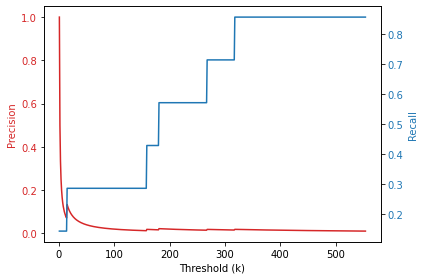

Graph for document 1


Graph for document 2


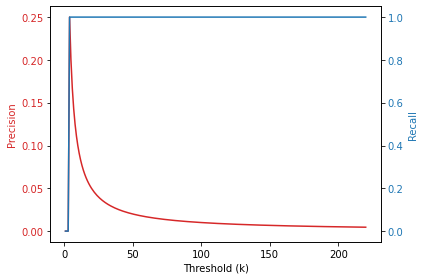

Graph for document 3


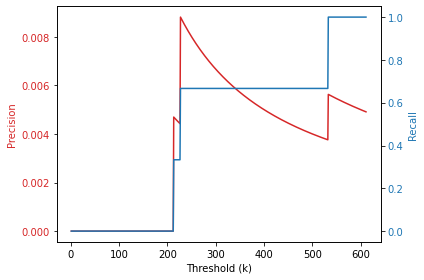

Graph for document 4


Graph for document 5


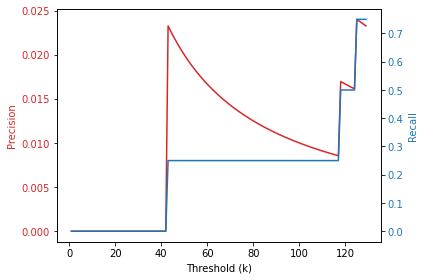

Graph for document 6


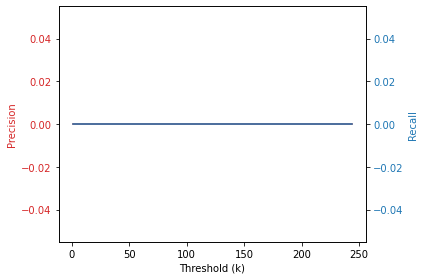

Graph for document 7


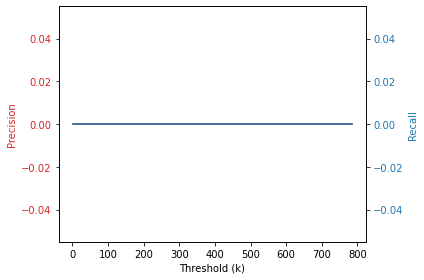

Graph for document 8


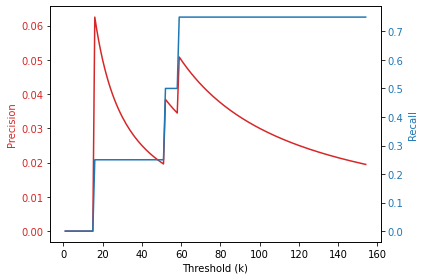

Graph for document 9


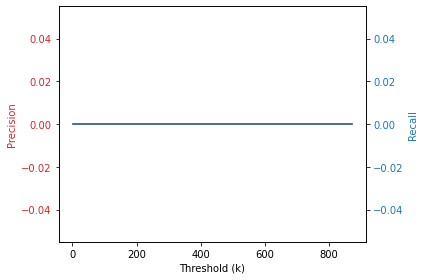

Graph for document 10


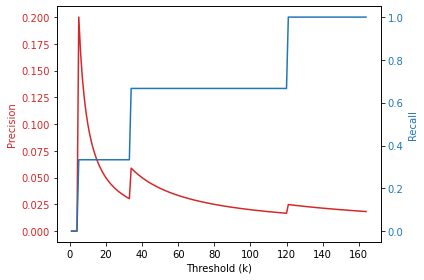

Graph for document 11


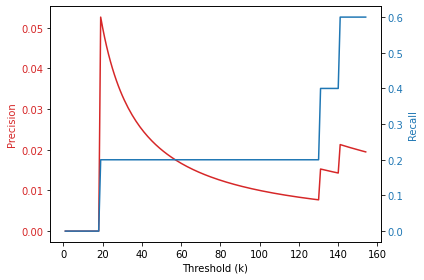

Graph for document 12


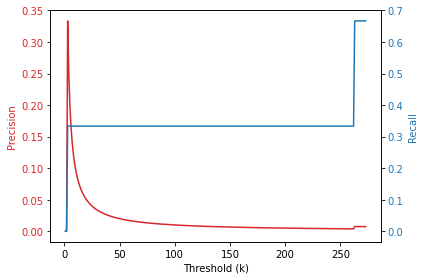

Graph for document 13


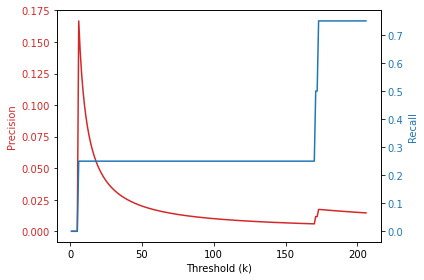

Graph for document 14


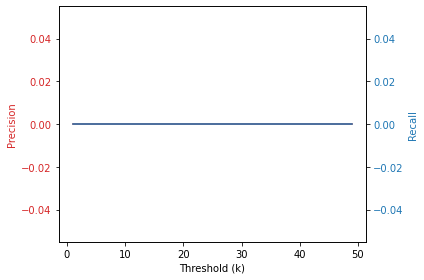

Graph for document 15


Graph for document 16


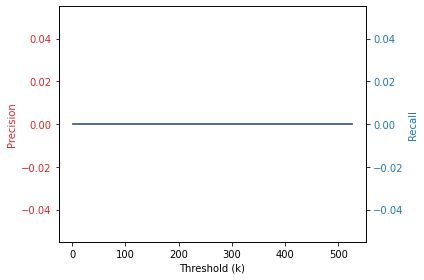

Graph for document 17


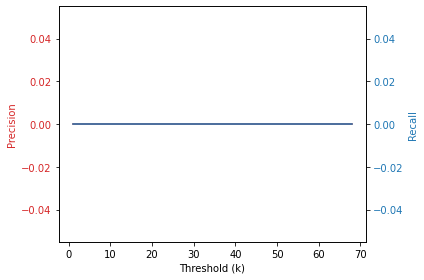

Graph for document 18


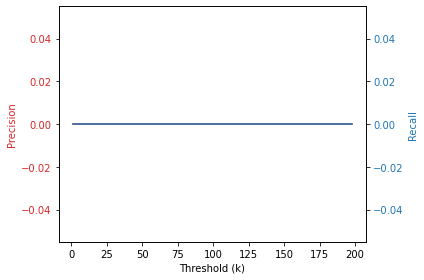

In [75]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [ ]:
best_precision_indices_new[10]

In [77]:
check_new = [elem[0] for elem in new_filtered_keywords[0]]
check_new

['Promotion',
 'Hochschule',
 'Kind',
 'Betreuer',
 'Stiftung',
 'Forschungseinrichtung',
 'Projekt',
 'Abschluss',
 'Organisation',
 'Institution',
 'Partner',
 'Stelle',
 'Ergebnis',
 'Person',
 'Promovierende',
 'Promovierenden',
 'Promovieren',
 'Stand',
 'Karriere',
 'Freiraum',
 'Interesse',
 'Forscher',
 'Ausland',
 'Tätigkeit',
 'Arbeit',
 'Universität',
 'Workshop',
 'Forschungs',
 'Hauptbetreuer',
 'DFG',
 'Studium',
 'Beruf',
 'Berufs',
 'Lehre',
 'Augenhöhe',
 'Antrag',
 'Entwicklung',
 'Informationsquelle',
 'Berufsausbildung',
 'Beratungs',
 'Tagungsorganisation',
 'Verlag',
 'Beeinträchtigung',
 'Monat',
 'Forschung',
 'Promotionsbedingung',
 'Konferenz',
 'Bezug',
 'Stakeholdern',
 'Thema',
 'Studienförderwerk',
 'Zweck',
 'Doktorand',
 'UdS.',
 'Zeitpunkt',
 'Bereich',
 'Veränderung',
 'Entwicklungsbezug',
 'Promotionsprogramm',
 'Mail',
 'Familie',
 'Betreuerin',
 'Deutschland',
 'Verwandte',
 'Promotionsprüfungsverfahren',
 'Partnerin',
 'Partnerinnen',
 'Arbeitszeit

In [78]:
lowercase_check_new = []
for i in range(len(check_new)):
    lowercase_check_new.append(check_new[i].lower()) 

In [79]:
list(set(lowercase_check_new).intersection(only_keywords[0]))

['gesundheit',
 'betreuung',
 'promovierende',
 'mobilität',
 'finanzierung',
 'promotion']

In [80]:
only_keywords[0]

['wissenschaftssystem',
 'betreuung',
 'promovierende',
 'promotion',
 'finanzierung',
 'mobilität',
 'gesundheit']

In [ ]:
lowercase_check_new.index('finanzierung') #check in whole phrases of text rank

In [ ]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [ ]:
best_recall_indices

In [ ]:
best_precision_indices_new = []
for i in range(len(precison_values)):
    best_precision_indices_new.append(precison_values[i].index(max(precison_values[i])))

In [ ]:
best_precision_indices_new

In [ ]:
best_f1_indices_new = []
for i in range(len(F1_values_new)):
    best_f1_indices_new.append(F1_values_new[i].index(max(F1_values_new[i])))

In [ ]:
best_f1_indices_new

In [ ]:
F1_indices_best = []
for i in range(len(f1)):
    F1_indices_best.append(F1_values_new[i].index(max(F1_values_new[i])))

In [ ]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [ ]:
best_recall_indices_element

In [ ]:
best_precision_indices_element = []

for i in range(len(best_precision_indices_new)):
    Precision_values = precison_values[i]
    best_precision_indices_element.append(Precision_values[best_precision_indices_new[i]])

In [ ]:
best_precision_indices_element

In [ ]:
# 13, 8, 5, 11, 10, 12

In [ ]:
data

In [ ]:
# df_lemma_phrases= pd.DataFrame(lemma_phrases, columns = ['rank', 'count', 'keyword'])

In [ ]:
# df_lemma_phrases[0:50]

In [ ]:
# from spacy.tokens import Span


# @spacy.registry.misc("prefix_scrubber")
# def prefix_scrubber():
#     def scrubber_func(span: Span) -> str:
#         while span[0].text in ("der", "Haben", "ander", "einen", "mein"):
#             span = span[1:]
#             print(span)
#         return span.text
#     return scrubber_func


# # @spacy.registry.misc("prefix_scrubber")
# # def prefix_scrubber():
# #     def scrubber_func(span: Span) -> str: 
# #         print(span[0].text)
# #         while span[0].text in ("der", "Haben", "ander", "einen", "mein", "meinen", "DFG", "HHU", "dies" ,"einer", "welch", "noch", "FH", "etc", "Ja", "weit", "kind", "Nein", "UdS", "Mut", "None", "kein", "ein", "Wie", "iGRAD", "vier", "FH", "zu", "SFB", "Meine", "Ein", "Eine"):
# #             span = span[1:]
# #         return span.text
# #     return scrubber_func